In [1]:
import pandas as pd
import numpy as np
import pickle
from Commen_Functions import get_score, get_score_df, merge_Results, load_sets

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [196]:
with open(f"/data/g0017139/Models/TSet1/MiniBatchKMeans_batch_size__1024_random_state__0_", 'rb') as f:
    results_grid = pickle.load(f)

In [144]:
SETS = 1    
with open(f'/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{SETS}/Merged_results.pkl', 'rb') as f:
    results_grid = pickle.load(f)
with open(f'/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{SETS}/Merged_GridHDDC.pkl', 'rb') as f:
    bic_df = pickle.load(f)
with open(f'/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{SETS}/MergedClustersHDDC.pkl', 'rb') as f:
    clustersHDDC = pickle.load(f)

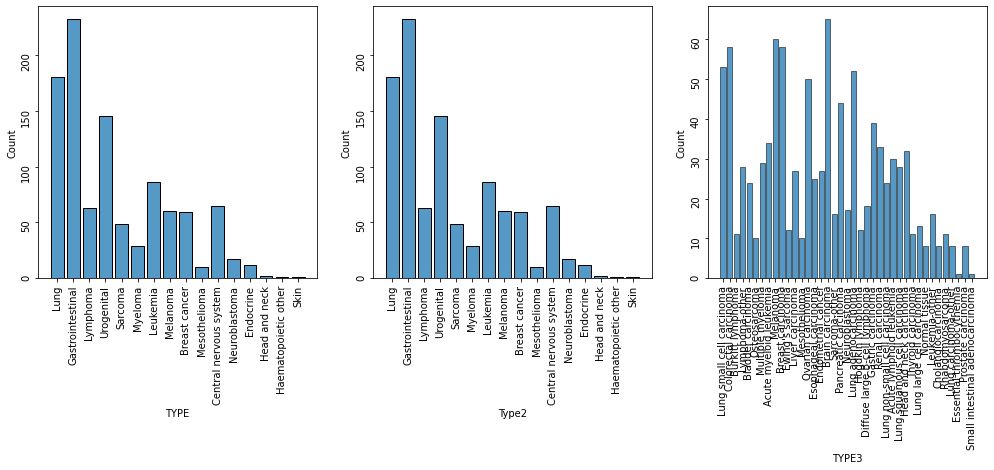

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
df, df_normalized, Type_df = load_sets(1)
fig, (ax1, ax2, ax3) = plt.subplots(1,3 ,figsize=(17,5))
sns.histplot(data=df, x="TYPE", shrink=.8, ax=ax1)
ax1.tick_params(labelrotation=90)
sns.histplot(data=df, x="Type2", shrink=.8, ax=ax2)
ax2.tick_params(labelrotation=90)
sns.histplot(data=df, x="TYPE3", shrink=.8, ax=ax3)
ax3.tick_params(labelrotation=90)
plt.show()

In [7]:
df, df_normalized, Type_df = load_sets(2)

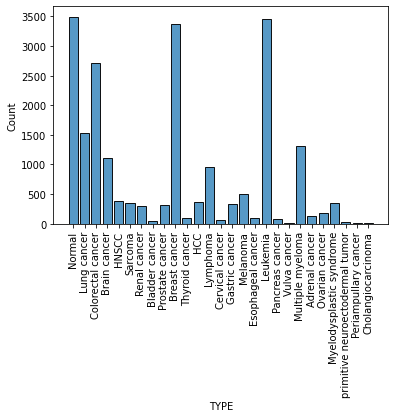

In [8]:
sns.histplot(data=df, x="TYPE", shrink=.8)
plt.xticks(rotation=90)
plt.show()

In [9]:
df, df_normalized, Type_df = load_sets(4)

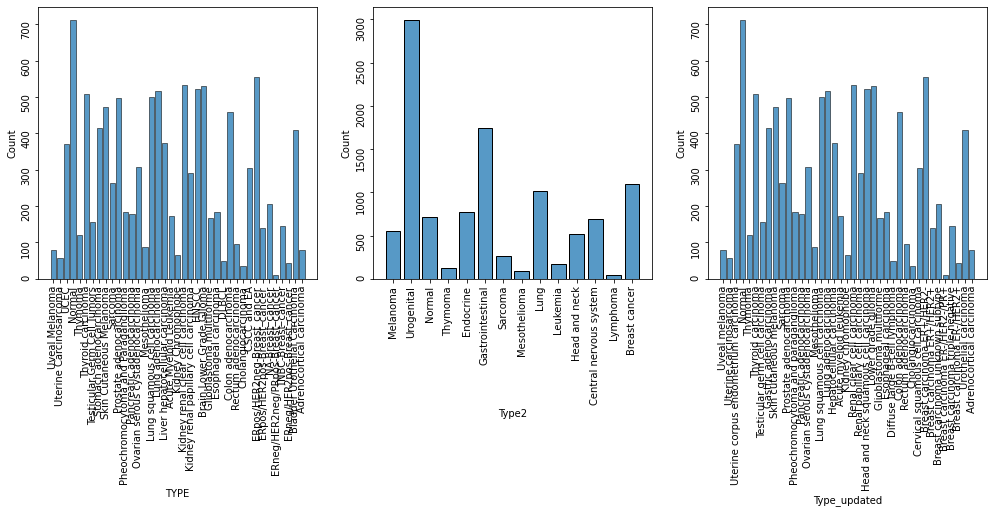

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3 ,figsize=(17,5))
sns.histplot(data=df, x="TYPE", shrink=.8, ax=ax1)
ax1.tick_params(labelrotation=90)
sns.histplot(data=df, x="Type2", shrink=.8, ax=ax2)
ax2.tick_params(labelrotation=90)
sns.histplot(data=df, x="Type_updated", shrink=.8, ax=ax3)
ax3.tick_params(labelrotation=90)
plt.show()

In [19]:
loads = [(1, 'TYPE', -3, 'CCLE'), (2, 'TYPE', -1, 'GPL570'), (4, 'Type2', -5, 'TCGA')]
# for load in loads:
#     df, df_normalized, Type_df = load_sets(load[0])
#     temp_df = df.copy()
#     try:
#         temp_df.iloc[:,:load[2]] = df_normalized.values
#     except AttributeError: 
#         temp_df.iloc[:,:load[2]] = df_normalized
#     for cancer_type, sub_df in temp_df.groupby(load[1]):
#         sub_df = sub_df.select_dtypes([np.number])
#         sub_df.to_csv(f'/data/g0017139/ICA_files/{load[3]}__Type_{cancer_type}.csv')



In [216]:
?Range1d

Object `Range1d` not found.


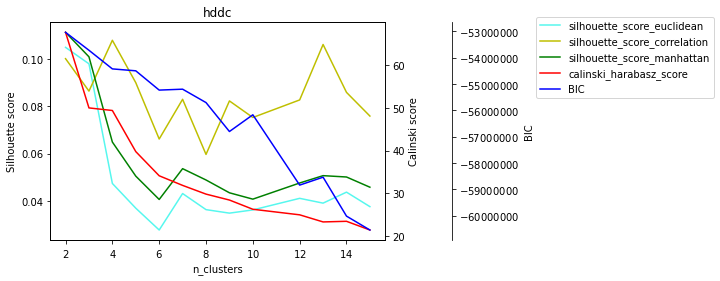

In [188]:
SETS = 1    
with open(f'/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{SETS}/Merged_results.pkl', 'rb') as f:
    results_grid = pickle.load(f)
with open(f'/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{SETS}/Merged_GridHDDC.pkl', 'rb') as f:
    bic_df = pickle.load(f)
with open(f'/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{SETS}/MergedClustersHDDC.pkl', 'rb') as f:
    clustersHDDC = pickle.load(f)
    
for alg in results_grid:
    results_grid[alg] = results_grid[alg].sort_values('n_clusters')
    ax = results_grid[alg].plot(x='n_clusters', y="silhouette_score_euclidean", legend=False)
    results_grid[alg].plot(x='n_clusters', y="silhouette_score_correlation",color="y", legend=False, ax=ax)
    results_grid[alg].plot(x='n_clusters', y="silhouette_score_manhattan",color="g", legend=False, ax=ax)
    ax2 = ax.twinx()
    results_grid[alg].plot(x="n_clusters", y="calinski_harabasz_score", ax=ax2, legend=False, color="r")
    if alg == 'hddc': 
        ax3 = ax.twinx()
        bic_df = bic_df.groupby('K').first().reset_index()
        bic_df['K'] = bic_df['K'].astype('int')
        results_grid[alg] = pd.merge(results_grid[alg], bic_df, left_on="n_clusters", right_on='K')
        results_grid[alg] = results_grid[alg].sort_values('n_clusters')
        ax3.spines.right.set_position(("axes", 1.2))
        results_grid[alg].plot(x="n_clusters", y="BIC", ax=ax3, legend=False, color="b")
        ax3.set_ylabel("BIC")
    ax.figure.legend(bbox_to_anchor=(1.25, 0.9), loc=2, borderaxespad=0.)
    ax.set_ylabel("Silhouette score")
    ax2.set_ylabel("Calinski score")
    ax.set_title(alg)
    plt.ticklabel_format(style='plain',useMathText = True)
    plt.show()

In [13]:
df, df_normalized, Type_df = load_sets(SETS)

In [14]:
from distinctipy import distinctipy
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def make_colors(df):
    cluster_colors = distinctipy.get_colors(max(15, len(set(df['Type']))),
                                colorblind_type='Deuteranomaly', n_attempts=10_000)
    cluster_colors = ['#%02x%02x%02x' % tuple((np.array(x)  * 250).astype(int)) for x in cluster_colors]

    color_mapper = dict(zip(set(df['Type']), cluster_colors))
    palette = []
    for key in sorted(color_mapper):
        palette.append(color_mapper[key])
    palette = sns.color_palette(palette)
    return cluster_colors, color_mapper, palette

In [15]:
def make_countplot(df, x, hue, pallete): 
    pallette = sns.set_palette(pallete)
    # Make the figure
    fig = plt.figure(figsize=(10,8))
    df = df.sort_values(hue)
    g = sns.countplot(x=x, hue=hue, palette=pallette, edgecolor=".6", 
                      data=df)
    g.get_legend().remove()
    g.set_title('Absoulte counts')
    
    fig2 = plt.figure(figsize=(12,8))
    counts = (df.groupby([hue])[x]
              .value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values(hue))
    g1 = sns.barplot(x=x, y="percentage", hue=hue,
                     data=counts, palette=pallette, edgecolor=".6")

    g1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    g1.set_title('Relative counts')
    return fig, fig2

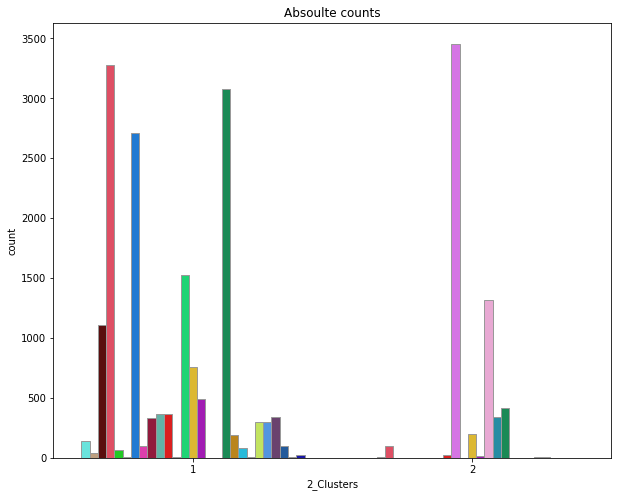

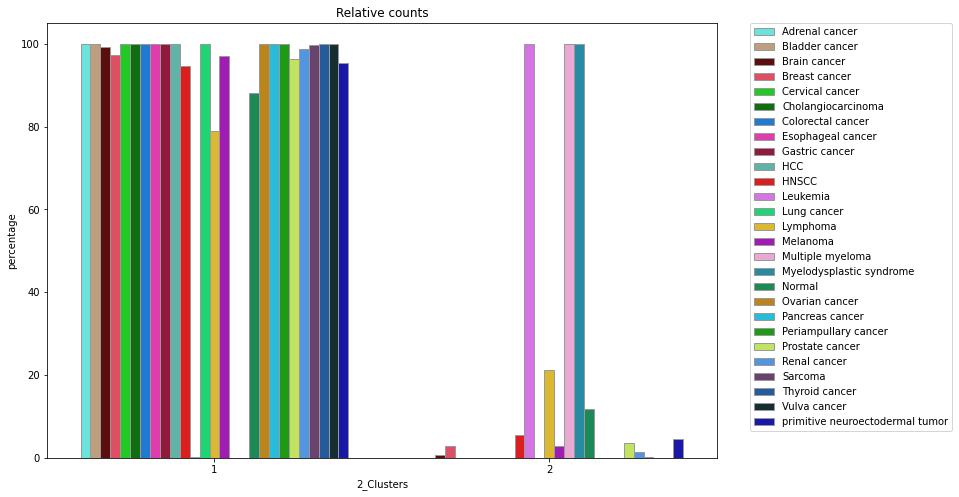

In [16]:
cluster_df = pd.read_csv(f"/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{SETS}/HDDCClusters2.csv", index_col=0)
cluster_df.columns = ['2_Clusters']
cluster_df['Type'] = df['TYPE'].values
cluster_df = cluster_df.fillna('UNKNOWN')
cluster_colors, color_mapper, palette = make_colors(cluster_df)
make_countplot(cluster_df, '2_Clusters', 'Type', palette)
plt.show()

In [17]:
Entrez_Map = pd.read_csv('/data/g0017139/Set1/Entrezid_mapping_using_org_Hs_eg_db_03052021.txt',
                               sep=None, engine='python', header=0,
)
Entrez_Map.sort_values(['CHR_Mapping', 'BP_Mapping'], axis=0, inplace=True)

In [109]:
eigenvectors = pd.read_csv(f"/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{SETS}/eigenvec0clusters2.csv", index_col=0)
eigenvectors = eigenvectors.abs()
if SETS == 1:
    eigenvectors.index = df.columns[:-3]
elif SETS == 2:
     eigenvectors.index = df.columns[:-1]
elif SETS == 3:
    eigenvectors.index = df.columns[:-5]

In [116]:
def get_genes(eigenvectors):
    important_genes = []
    ids = []
    for column in eigenvectors:
        value = str(eigenvectors.index[eigenvectors[column].argmax()])
        if value not in ids:
            ids.append(str(value))
        weight = eigenvectors[column][value]
        title = column.replace('X', 'Component ')
        important_genes.append((title,value,weight))
    Entrez_Map['mapped_entrez_v1'] = Entrez_Map['mapped_entrez_v1'].astype(str)
    important_genes_df = Entrez_Map[Entrez_Map['mapped_entrez_v1'].isin(ids)]
    important_genes_df
    return important_genes, important_genes_df, ids


In [117]:
important_genes, important_genes_df, ids = get_genes(eigenvectors)

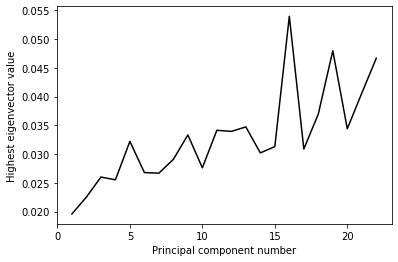

In [138]:
x_axis = []
y_axis = []
for i, x in enumerate(important_genes):
    x_axis.append(i + 1)
    y_axis.append(x[2])
sns.lineplot(x=x_axis, y=y_axis, color='black')
plt.xlabel('Principal component number')
plt.ylabel('Highest eigenvector value')
plt.show()

In [97]:
print(' '.join(important_genes_df['SYMBOL'].astype(str).values))

FMO5 TSTD1 CXCR6 CADM2 RPL34 LEAP2 RBM12B KIFC2 MLANA IGFBPL1 GUCY2C NUTM1 ZNF205 TEKT1 LLGL1 OSBPL7 DSG1 GAMT GAPDHS MMP24 SLC25A17 RPL10


In [98]:
df.columns = [str(x) for x in df.columns]
get_cols = [str(x) for x in ids]
get_cols.append('TYPE')

box_df = df[get_cols].copy()

box_df['Clusters'] = cluster_df['2_Clusters'].values

box_df = box_df.fillna('UNKNOWN')

In [99]:
from scipy.stats import mannwhitneyu

def man_witney(df, genes):
    for x in genes:
        a = df[df['Clusters'] == 1][x[1]].values
        b = df[df['Clusters'] == 2][x[1]].values
        p = mannwhitneyu(a, b)[1]
        if p < 0.05:
            print(f'Gene \u001b[36m{x[1]}\x1b[0m has a p value of {p}')
        else:
            print(f'Gene {x[1]} has a p value of {p}')


In [100]:
from scipy.stats import mannwhitneyu
man_witney(box_df, important_genes)

Gene 256646 has a p value of 0.0
Gene 253559 has a p value of 0.008979947572055181
Gene 6134 has a p value of 0.0
Gene 2984 has a p value of 0.00546184266277046
Gene 2593 has a p value of 2.2891424449156024e-196
Gene 90990 has a p value of 1.4194300997605915e-17
Gene 2330 has a p value of 1.1486246896267104e-66
Gene 10663 has a p value of 4.597875649213862e-196
Gene 116842 has a p value of 5.496849332669965e-35
Gene 10478 has a p value of 0.0003799761586904852
Gene 1828 has a p value of 3.5974381686163385e-76
Gene 114881 has a p value of 0.0
Gene 100131187 has a p value of 1.404675786305806e-38
Gene 7755 has a p value of 4.5322344307410124e-21
Gene 6164 has a p value of 0.0
Gene 83659 has a p value of 0.0
Gene 10893 has a p value of 2.1486341765734714e-68
Gene 3996 has a p value of 0.7926253472487321
Gene 389677 has a p value of 4.131675314331416e-07
Gene 347252 has a p value of 0.0
Gene 26330 has a p value of 0.0
Gene 2315 has a p value of 2.163821803465988e-101


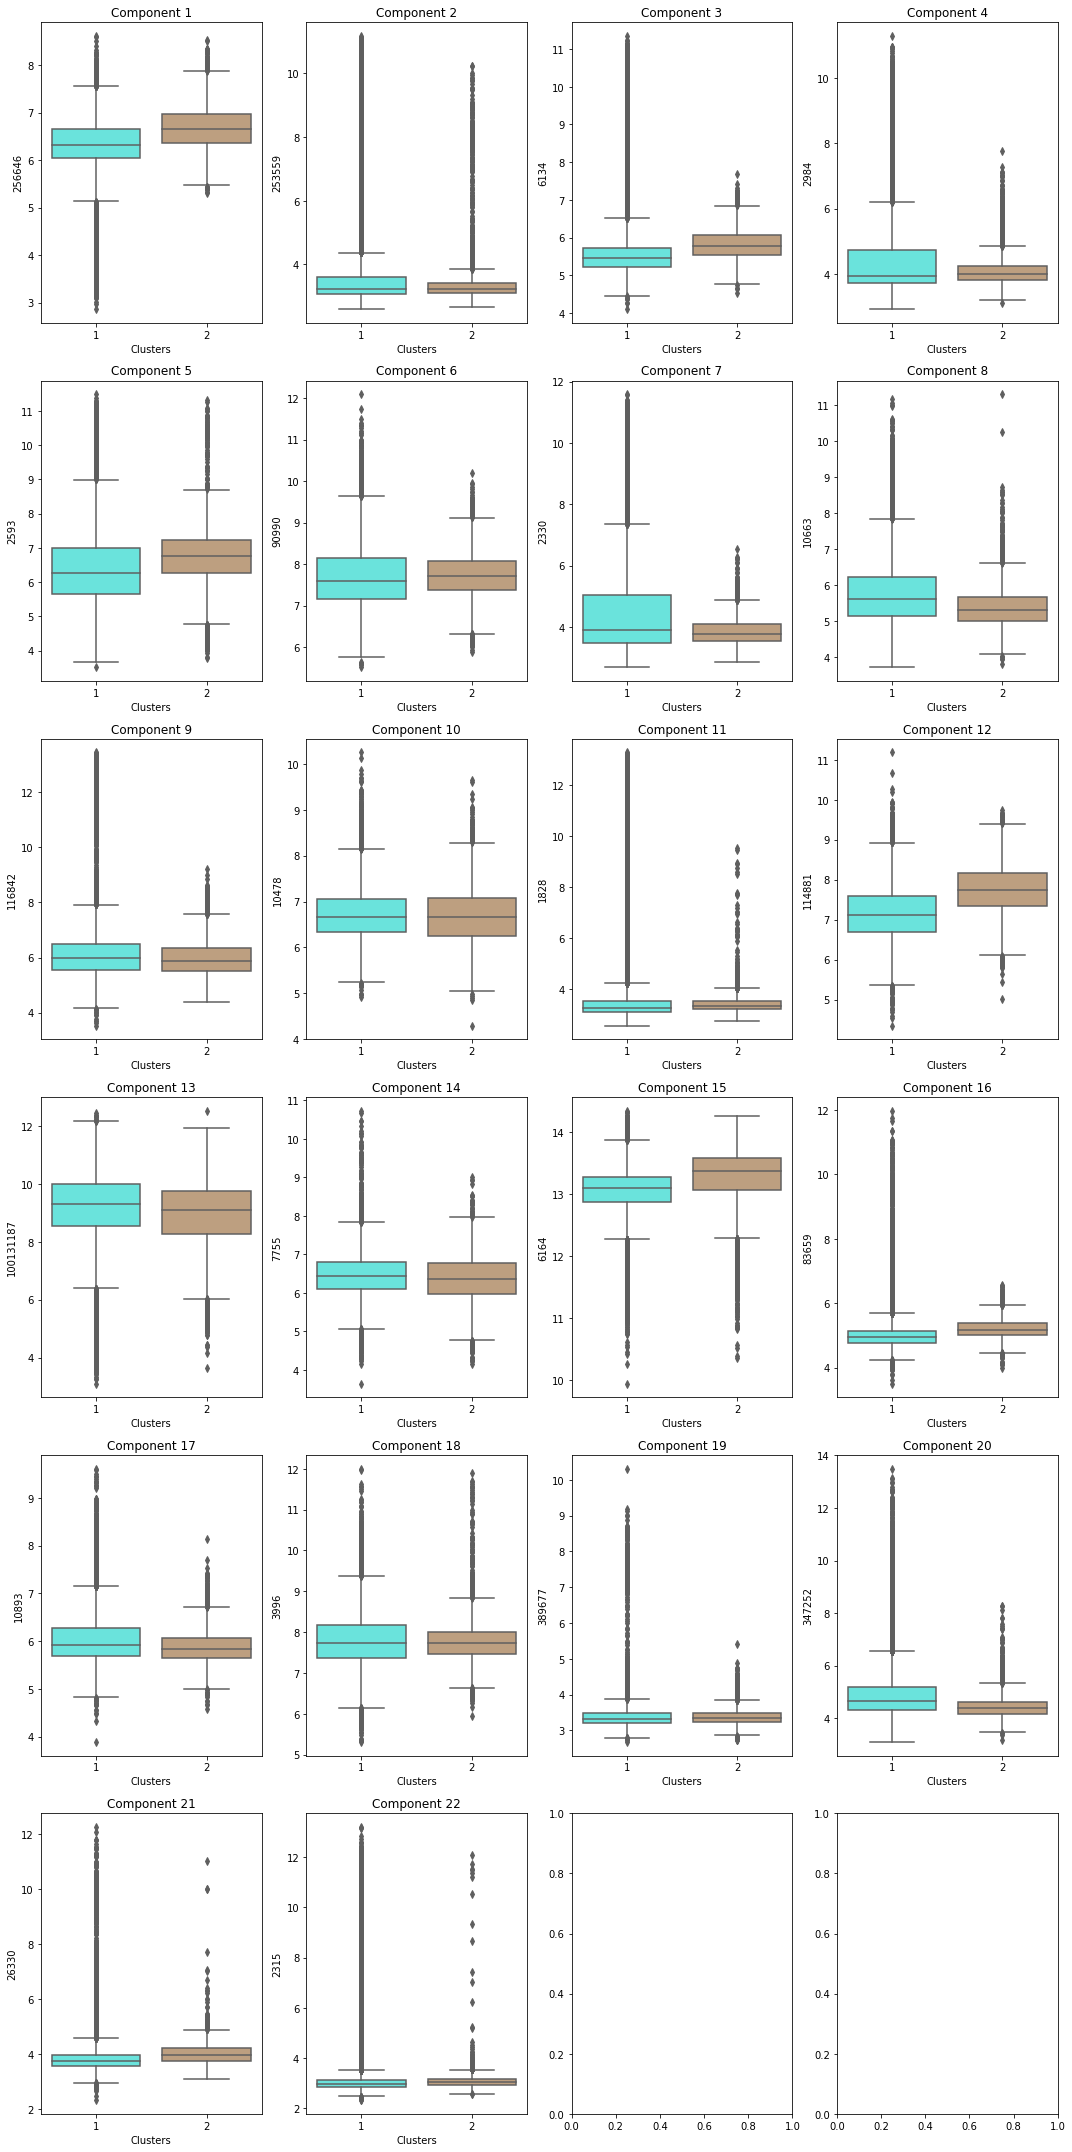

In [101]:
def make_boxplots(df, genes):
    size = len(genes) // 4
    if len(genes) % 4 != 0:
        size += 1
    fig, axs = plt.subplots(size,4, figsize=(15,30))
    i = 0
    axs = axs.ravel()
    for x in genes:
        sns.boxplot(x="Clusters", y=x[1], data=df,ax=axs[i])
        axs[i].set_title(x[0])
        i += 1
    fig.tight_layout()
make_boxplots(box_df, important_genes)

In [102]:
eigenvectors = pd.read_csv(f"/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{SETS}/eigenvec1clusters2.csv", index_col=0)
eigenvectors = eigenvectors.abs()
if SETS == 1:
    eigenvectors.index = df.columns[:-3]
elif SETS == 2:
     eigenvectors.index = df.columns[:-1]
elif SETS == 3:
    eigenvectors.index = df.columns[:-5]

In [103]:
important_genes, important_genes_df, ids = get_genes(eigenvectors)

In [104]:
print(' '.join(important_genes_df['SYMBOL'].astype(str).values))

AGO4 CR1L HIST1H4B LINC01013 EIF4H PTPA DNTT ERLIN1 MYH6 NDUFAF1 INTS14 IRF3 NAPSB KAT14 ABHD16B OSBP2


In [105]:
important_genes_df

,mapped_entrez_v1,CHR_Mapping,BP_startloc,BP_endloc,sense_or_antisense,GENENAME,SYMBOL,BP_Mapping
6533,192670,1,35807819.0,3.585789e+07,1,argonaute RISC component 4,AGO4,3.583285e+07
21753,1379,1,207645112.0,2.077237e+08,1,complement C3b/C4b receptor 1 like,CR1L,2.076844e+08
4632,8366,6,26026895.0,2.602725e+07,-1,histone cluster 1 H4 family member b,HIST1H4B,2.602707e+07
18553,100507254,6,132133977.0,1.321582e+08,1,long intergenic non-protein coding RNA 1013,LINC01013,1.321461e+08
13187,7458,7,74174375.0,7.419710e+07,1,eukaryotic translation initiation factor 4H,EIF4H,7.418574e+07
18310,5524,9,129111316.0,1.291489e+08,1,protein phosphatase 2 phosphatase activator,PTPA,1.291301e+08
15346,1791,10,96304380.0,9.633856e+07,1,DNA nucleotidylexotransferase,DNTT,9.632147e+07
15717,10613,10,100150090.3,1.001860e+08,-1,ER lipid raft associated 1,ERLIN1,1.001681e+08
4172,4624,14,23381989.0,2.340828e+07,-1,myosin heavy chain 6,MYH6,2.339513e+07
7610,51103,15,41387350.0,4.140248e+07,-1,NADH:ubiquinone oxidoreductase complex assembl...,NDUFAF1,4.139491e+07


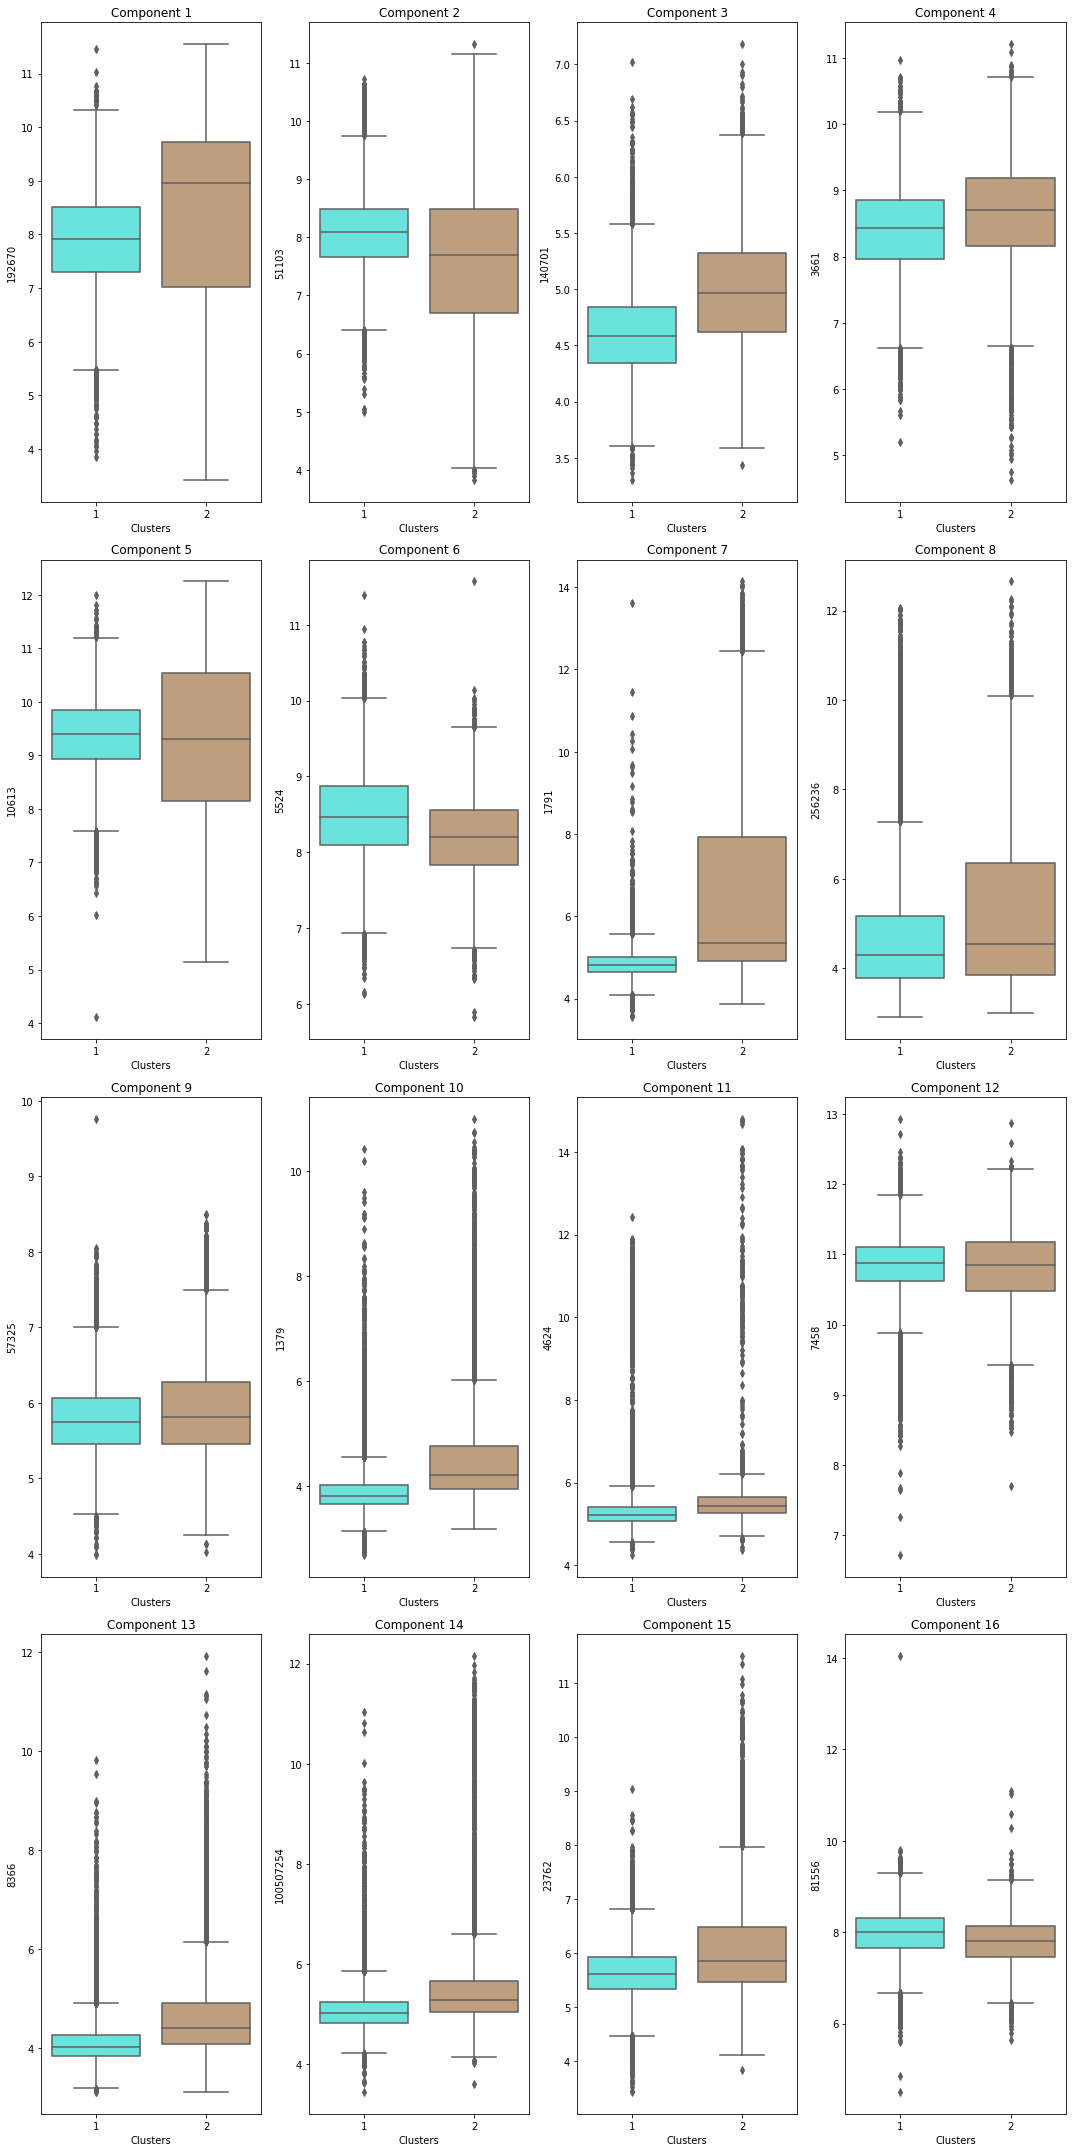

In [106]:
df.columns = [str(x) for x in df.columns]
get_cols = [str(x) for x in ids]
get_cols.append('TYPE')

box_df = df[get_cols].copy()

box_df['Clusters'] = cluster_df['2_Clusters'].values

box_df = box_df.fillna('UNKNOWN')

make_boxplots(box_df, important_genes)

In [107]:
man_witney(box_df, important_genes)

Gene 192670 has a p value of 1.1655985656020506e-226
Gene 51103 has a p value of 1.1982245476069857e-147
Gene 140701 has a p value of 0.0
Gene 3661 has a p value of 6.227715411448049e-130
Gene 10613 has a p value of 0.14907193947415123
Gene 5524 has a p value of 1.0738541315689822e-215
Gene 1791 has a p value of 0.0
Gene 256236 has a p value of 7.319717683533057e-62
Gene 57325 has a p value of 2.204626374584945e-22
Gene 1379 has a p value of 0.0
Gene 4624 has a p value of 0.0
Gene 7458 has a p value of 0.0005760488085014178
Gene 8366 has a p value of 0.0
Gene 100507254 has a p value of 0.0
Gene 23762 has a p value of 1.966340065025772e-198
Gene 81556 has a p value of 3.4936885205035175e-110
